# Continuum fitting

$\mathrm{LiMe}$ provides some basic functions to fit the continuum as a polynomical. We are going to use the spectrum from GP121903 to showcase this operation:

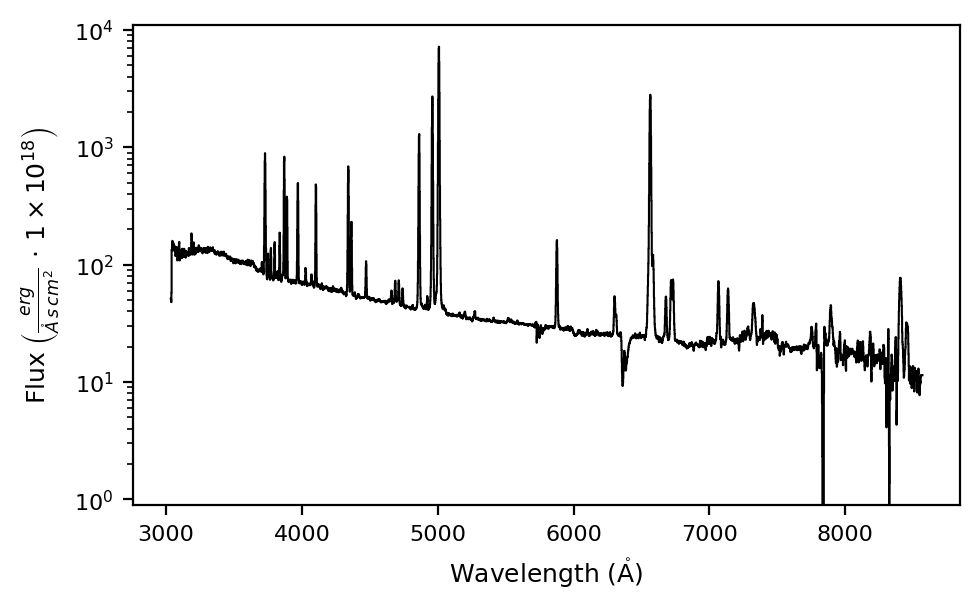

In [1]:
import numpy as np
from astropy.io import fits
from pathlib import Path
import lime

# State the input files
obsFitsFile = '../0_resources/spectra/gp121903_osiris.fits'
cfgFile = '../0_resources/osiris.toml'

# Spectrum parameters
z_obj = 0.19531
norm_flux = 1e-18

# Create the observation object
gp_spec = lime.Spectrum.from_file(obsFitsFile, instrument='osiris', redshift=z_obj, norm_flux=norm_flux)
gp_spec.plot.spectrum(rest_frame=True, log_scale=True)

As we can see from the plot above, this object has a week continuum compared to the emission lines. To mask these features we are going to do an iterative process with the $\tt{lime.Spectrum.fit.continuum}$ function:

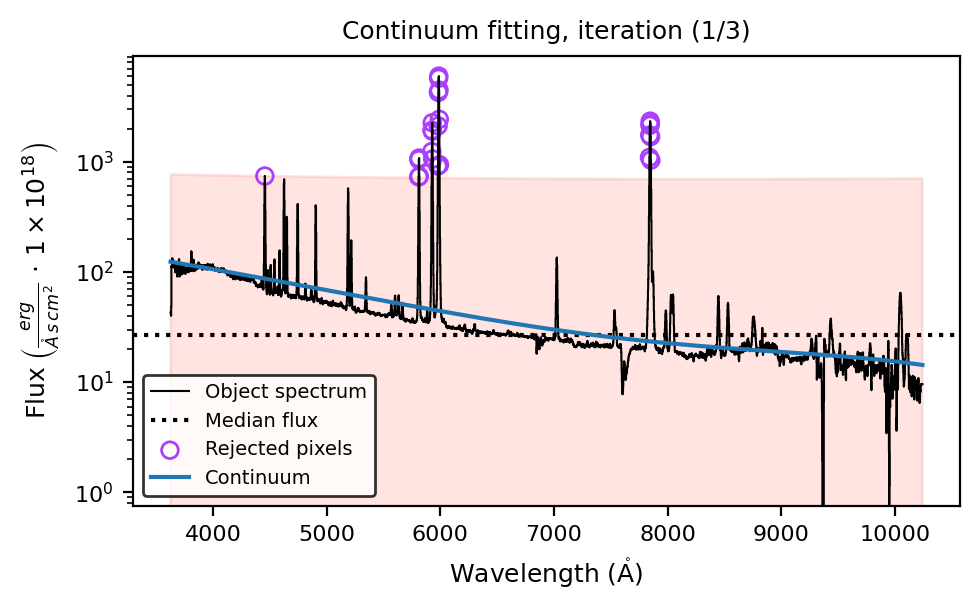

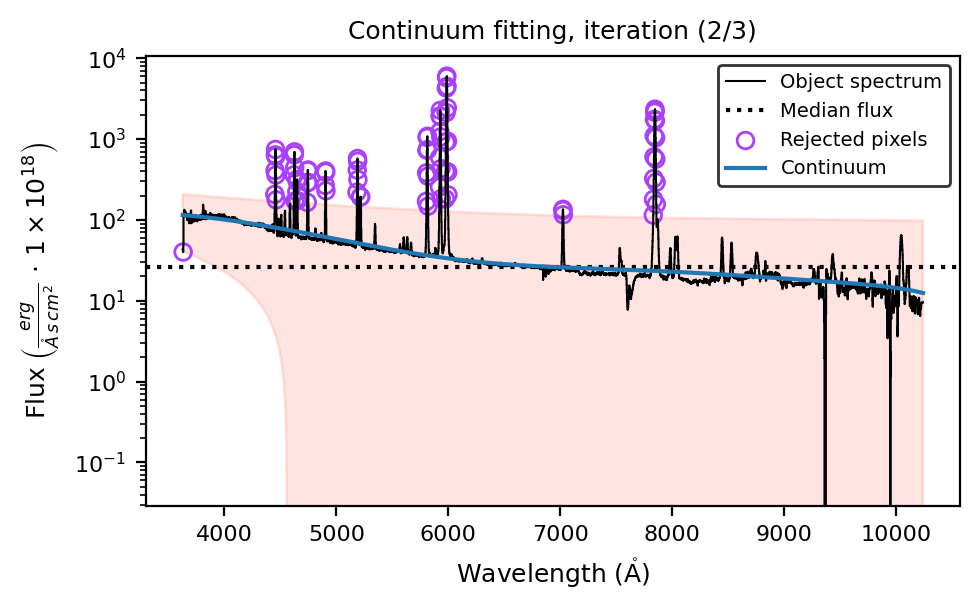

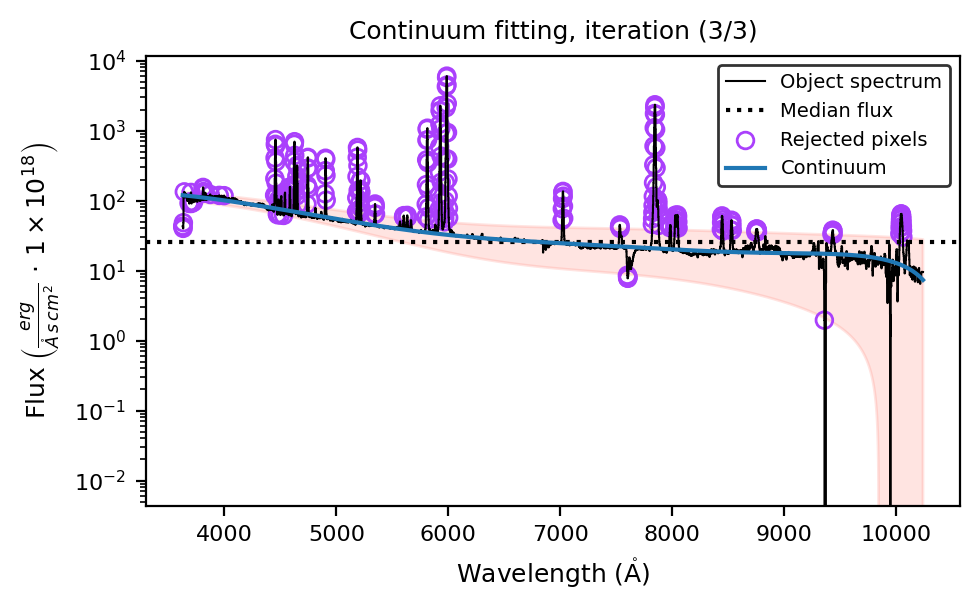

In [3]:
gp_spec.fit.continuum(degree_list=[3, 6, 6], emis_threshold=[3, 2, 1.5], plot_steps=True, log_scale=True)

By setting ``plot_steps=True`` we can see the steps the steps of the iteration. The result is affected by the input arguments: 
* The ``degree_list`` sets the degree of the fitting polinomyal and the number of iterations.
* The ``emis_threshold`` sets the intensity threshold for the rejected pixels (marked on purple on the plots). You can also set an ``abs_threshold`` to change the lower intensity threshold. Otherwise it will be the same for pixels above and below the continuum fitting.

By smoothly increasing the polynomial degree number and the number of rejected pixels it is easier to get a robust estimation of the underlying continuum.

The fitted continuum and the standard deviation of the observed minus fitted flux is stored as:

In [7]:
print(gp_spec.cont)
print(gp_spec.cont_std)

[119.24158210981295 119.14751482372276 119.0532858338729 ...
 7.463363476396353 7.401425013028529 7.339188641922192]
4.099014712009923


## Takeaways
 * $\mathrm{LiMe}$ provides an iterative function $\tt{lime.Spectrum.fit.continuum}$  to fit the continuum
 * The user can provide a list with the degrees of the polynomials and the intesity threshold for the emission and/or absorption features to be excluded at each iteration.
 * The fitted continuum is stored as in the $\tt{lime.Spectrum.cont}$ attribute an it is used in some tasks such as the line detection.
 * These functions arguments can help to adjust the outputs to the user needs. You can read the function documentation on the [API](https://lime-stable.readthedocs.io/en/latest/reference/API.html)